<a href="https://colab.research.google.com/github/mrv7777/MLP/blob/main/BA_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

In [3]:
df = pd.read_excel('data_transform.xlsx')

In [4]:
df.head()

,Sales,Price
0,53,1.0
1,12,3.4
2,15,3.3
3,27,1.4
4,8,3.7


<Axes: xlabel='Price', ylabel='Sales'>

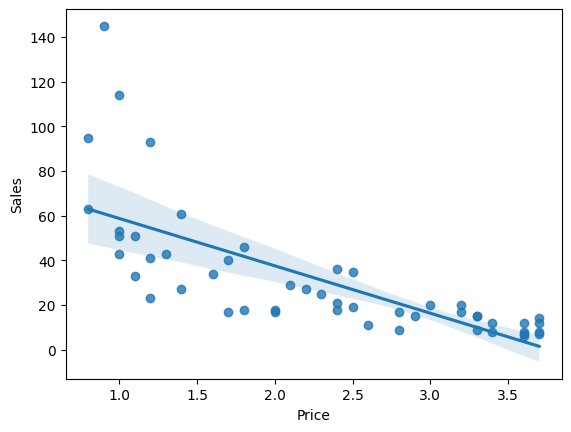

In [8]:
sns.regplot(data=df,x=df.Price,y=df.Sales)

In [9]:
model = smf.ols(formula='Sales ~ Price',data=df)

In [10]:
result = model.fit()

What is the r-square value

In [11]:
result.rsquared


0.5263620045670871

Is the model significant?

In [13]:
result.pvalues['Price']

2.5213153941334994e-09

What is the value of the intercept?

In [14]:
result.params['Intercept']

79.9927023291873

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     53.34
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           2.52e-09
Time:                        12:24:38   Log-Likelihood:                -219.72
No. Observations:                  50   AIC:                             443.4
Df Residuals:                      48   BIC:                             447.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.9927      7.209     11.095      0.0


What is the value of the slope?

In [20]:
result.params['Price']

-21.205211177402507

In [22]:
df['log_price'] = np.log(df.Price)

In [23]:
df.head()

,Sales,Price,log_price
0,53,1.0,0.000000
1,12,3.4,1.223775
2,15,3.3,1.193922
3,27,1.4,0.336472
4,8,3.7,1.308333


<Axes: xlabel='log_price', ylabel='Sales'>

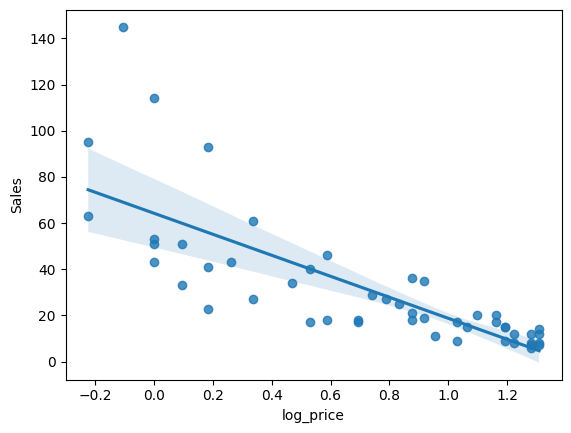

In [24]:
sns.regplot(data=df,x=df.log_price,y=df.Sales)

In [26]:
model2 = smf.ols(formula='Sales ~ log_price',data=df)

Use natural log transformation only on the price column and refit the model using the transformed dataset answer questions (5) to (8)

Hint: Use np.log

What is the value of R^2 on the transformed dataset

In [27]:
result = model2.fit()

In [28]:
result.rsquared

0.6002784104994979

Is the model significant?

In [29]:
result.pvalues['log_price']

4.040670182934825e-11

What is the value of the intercept?

In [31]:
result.params['Intercept']

64.26487481758407


What is the value of the slope?

In [32]:
result.params['log_price']

-45.5151941974737

Pandya Motors, a passenger car manufacturer, wants to predict the profit for its cars based on the expenditure spent on areas like safety features, tech features, and marketing. Every car has multiple variants like the base model, middle variant, top model, automatic gearbox, etc. Based on the data provided, build a linear regression model and predict the profit. Use the instructions provided below.

i. You are provided with two excel files: X.xlsx and y.xlsx, where X is the feature matrix, and y is the target variable.
ii. Use only google collab for doing this assignment as we have created the scoring scheme based on the results obtained from Google Collab.
iii. Do not do any kind of feature engineering as the data is already feature-engineered and ready to be used for building the regression model.
iv. Use train_test_split from sklearn.model_selection and keep the test_size = 0.2, random_state = 0
v. Next, use LinearRegression from sklearn.linear_model and build the regression model
vi. As usual, fit the model on X_train and y_train
vii. Then predict on X_test

Answer the following questions:

In [33]:
X = pd.read_excel('X.xlsx')
Y = pd.read_excel('y.xlsx')

In [37]:
X.head()

,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
0,175349.20,116897.80,491784.10,0,1
1,172597.70,131377.59,463898.53,0,0
2,163441.51,81145.55,427934.54,1,0
3,154372.41,98671.85,403199.62,0,1
4,152107.34,71391.77,386168.42,1,0


In [39]:
Y.head()

,Profit
0,227261.83
1,226792.06
2,226050.39
3,217901.99
4,201187.94


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.linear_model import LinearRegression

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
xtrain.head()

(40, 5)
(10, 5)
(40, 1)
(10, 1)


,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
33,65493.95,83057.49,234634.81,1,0
35,56014.02,65047.44,225517.64,0,1
26,85328.87,124135.98,154050.07,1,0
34,56426.07,137693.92,230797.67,0,0
18,101749.16,94175.79,314919.57,1,0


In [47]:
ytrain.head()

,Profit
33,131778.92
35,131479.51
26,140733.54
34,131712.80
18,159266.90


In [48]:
model = LinearRegression()

In [49]:
model.fit(xtrain,ytrain)

LinearRegression()

In [50]:
model.score(xtrain,ytrain)

0.9501847627493607

In [65]:
ypred = model.predict(xtest)

In [66]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9347068473282426

In [53]:
model.intercept_

array([69744.98712385])

In [62]:
Ypred = model.predict(np.array([[1315.46,115816.21,297114.46,1,0]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
np.array([1315.46,115816.21,297114.46,1,0]).reshape(1,-1)

array([[1.3154600e+03, 1.1581621e+05, 2.9711446e+05, 1.0000000e+00,
        0.0000000e+00]])

In [64]:
Ypred

array([[84489.1056363]])